<a href="https://colab.research.google.com/github/SarveshWan/Deep-learning/blob/main/Handwritten_Digits_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

# Load MNIST Dataset

In [2]:
from keras.datasets import mnist
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

In [3]:
xtrain.shape

(60000, 28, 28)

In [4]:
xtrain

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

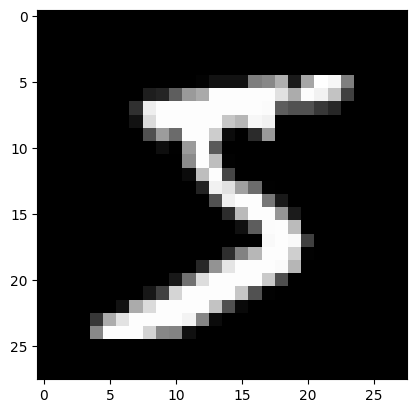

In [5]:
import matplotlib.pyplot as plt
plt.imshow(xtrain[0],cmap='gray')

In [6]:
xtest.shape

(10000, 28, 28)

In [7]:
ytest

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

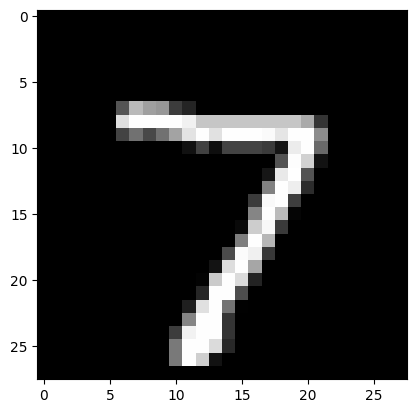

In [8]:
plt.imshow(xtest[0], cmap='gray')

Displaying first 9 images from train data

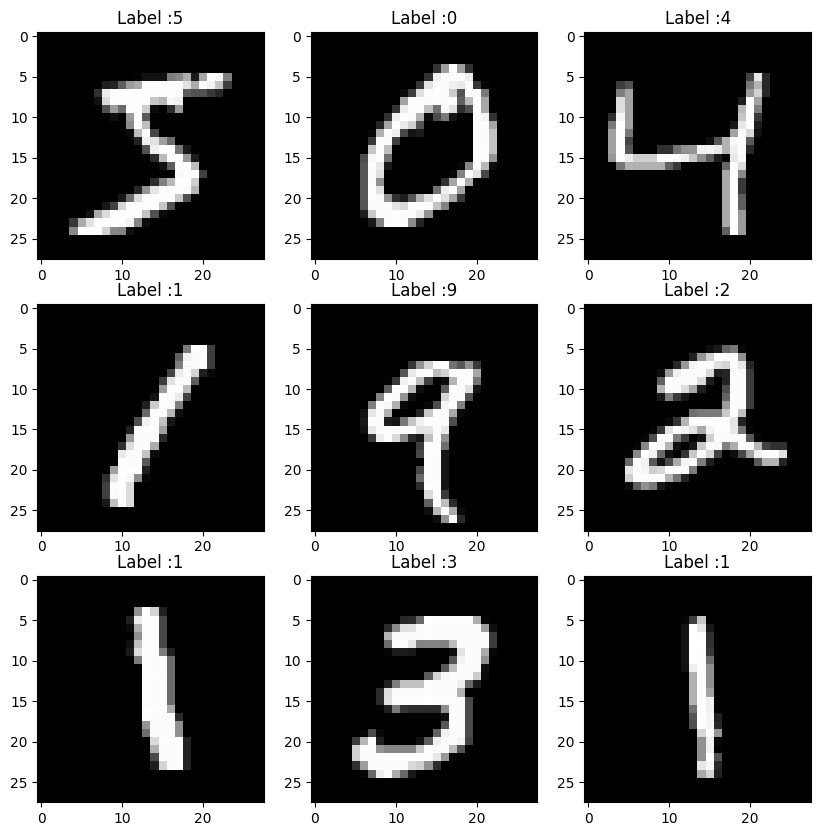

In [9]:
plt.figure(figsize=(10, 10))
for i in range(9):
  plt.subplot(3, 3, i+1)
  plt.imshow(xtrain[i], cmap='gray')
  plt.title(f"Label :{ytrain[i]}")

In [10]:
import numpy as np
np.unique(ytrain)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [11]:
len(np.unique(ytrain))

10

This is a multiclass classification problem
preprocess image data

In [12]:
xtrain_scl = xtrain.astype("float32")/255
xtest_scl = xtest.astype("float32")/255

In [13]:
xtrain_scl[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

# Onehot encode the y features

In [14]:
from keras.utils import to_categorical
ytrain_cat = to_categorical(ytrain)
ytest_cat = to_categorical(ytest)


In [15]:
ytrain[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [16]:
ytrain_cat[0:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [17]:
ytest[0:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [18]:
ytest_cat[0:5]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [19]:
xtrain.shape

(60000, 28, 28)

# Build the neural network

In [20]:
from keras.models import Sequential
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense,Dropout

In [21]:
model = Sequential()

In [22]:
#Added Input layer
model.add(Input(shape=(28, 28,1)))

In [23]:
# Add convolution Layer1
model.add(Conv2D(filters=32, kernel_size=(3,3),activation='relu'))

In [24]:
# Add Max pooling 1
model.add(MaxPooling2D(pool_size=(2, 2)))

In [25]:
# Add Convolution Layer2
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))

In [26]:
# Add Max pooling2
model.add(MaxPooling2D(pool_size=(2, 2)))

In [27]:
# Add Flatten Layer
model.add(Flatten())

In [28]:
# Add Dropout Layre
model.add(Dropout(0.5))


In [29]:
# Output Layer
model.add(Dense(ytrain_cat.shape[1], activation='softmax'))

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [31]:
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [32]:
hist = model.fit(xtrain_scl, ytrain_cat, epochs=15, validation_split=0.1)

Epoch 1/15
1688/1688 [==============================] - 17s 6ms/step - loss: 0.2339 - accuracy: 0.9269 - val_loss: 0.0636 - val_accuracy: 0.9822
Epoch 2/15
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0895 - accuracy: 0.9729 - val_loss: 0.0432 - val_accuracy: 0.9887
Epoch 3/15
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0679 - accuracy: 0.9794 - val_loss: 0.0461 - val_accuracy: 0.9883
Epoch 4/15
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0584 - accuracy: 0.9809 - val_loss: 0.0372 - val_accuracy: 0.9910
Epoch 5/15
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0533 - accuracy: 0.9827 - val_loss: 0.0358 - val_accuracy: 0.9898
Epoch 6/15
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0456 - accuracy: 0.9854 - val_loss: 0.0312 - val_accuracy: 0.9912
Epoch 7/15
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0436 - accuracy: 0.9867 - val_loss: 0.0311 - val_accuracy

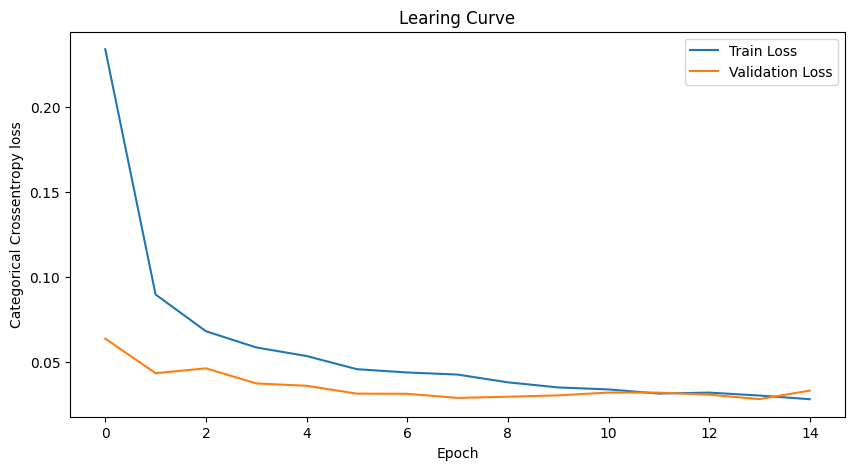

In [33]:
plt.figure(figsize=(10, 5))
plt.plot(hist.history['loss'], label='Train Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.title('Learing Curve')
plt.ylabel('Categorical Crossentropy loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Evaluate the model in train and test

In [34]:
model.evaluate(xtrain_scl, ytrain_cat)

1875/1875 [==============================] - 5s 2ms/step - loss: 0.0116 - accuracy: 0.9969


[0.011583829298615456, 0.9969333410263062]

In [35]:
model.evaluate(xtest_scl, ytest_cat)

313/313 [==============================] - 1s 3ms/step - loss: 0.0241 - accuracy: 0.9912


[0.02405748888850212, 0.9911999702453613]

# Predict results for train and test

In [36]:
yprob_train = model.predict(xtrain_scl)
yprob_test = model.predict(xtest_scl)

313/313 [==============================] - 1s 2ms/step


In [37]:
yprob_train[0:5]

array([[8.9214504e-11, 3.4546308e-13, 1.1352741e-11, 1.9977000e-03,
        1.7156262e-16, 9.9800211e-01, 3.5088997e-13, 3.1614572e-10,
        1.7972783e-07, 1.4144374e-08],
       [1.0000000e+00, 1.3489871e-16, 1.1264351e-09, 2.0027344e-11,
        7.1757823e-13, 5.2655514e-12, 6.3911663e-09, 6.3138120e-14,
        9.1881773e-09, 8.4297086e-10],
       [6.1893810e-18, 2.9323948e-08, 3.2992650e-11, 2.2596129e-12,
        9.9999881e-01, 3.0009096e-12, 9.5103762e-14, 3.9811219e-08,
        8.0015575e-08, 1.0921952e-06],
       [1.7292037e-09, 9.9998569e-01, 1.1244668e-07, 2.2889173e-10,
        3.9172564e-06, 5.8830046e-10, 1.4401719e-07, 7.8160310e-06,
        2.2391018e-06, 4.8771224e-08],
       [9.9843250e-14, 8.1641612e-12, 5.1697403e-11, 1.4119016e-09,
        3.0383096e-06, 1.7602117e-10, 1.2252554e-16, 2.2119806e-07,
        2.5456648e-06, 9.9999428e-01]], dtype=float32)

In [38]:
yprob_test[0:5]

array([[1.88603799e-10, 6.79749714e-13, 2.67872213e-08, 2.69178244e-08,
        9.80946315e-16, 4.49451934e-12, 1.12475690e-19, 1.00000000e+00,
        7.16217016e-11, 4.65218708e-09],
       [1.15496185e-07, 1.68256364e-07, 9.99999285e-01, 1.13596799e-10,
        3.64449399e-12, 4.69325392e-16, 4.61050320e-07, 1.27738152e-13,
        3.54802232e-09, 3.11540717e-14],
       [1.66810512e-08, 9.99939322e-01, 3.38106190e-07, 2.29298069e-09,
        4.14664282e-05, 3.48068383e-08, 1.00663534e-07, 9.00514442e-06,
        9.62802642e-06, 1.92734859e-08],
       [9.99988079e-01, 1.14653194e-14, 1.90181400e-08, 7.10974224e-10,
        4.60925534e-11, 3.81099348e-08, 1.09728098e-05, 9.89585358e-11,
        9.59049430e-07, 4.06116873e-09],
       [5.99987985e-12, 7.92931476e-13, 3.01851912e-11, 7.38930876e-14,
        9.99997497e-01, 2.59959502e-12, 6.07306289e-11, 1.02060672e-10,
        2.75471468e-09, 2.55169607e-06]], dtype=float32)

In [39]:
import numpy as np
ypred_train = np.argmax(yprob_train, axis=1)
ypred_test = np.argmax(yprob_test, axis=1)

In [40]:
ypred_train[0:5]

array([5, 0, 4, 1, 9])

In [41]:
ytrain[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [42]:
ypred_test[0:5]

array([7, 2, 1, 0, 4])

In [43]:
ytest[0:5]

array([7, 2, 1, 0, 4], dtype=uint8)

# plot the confusion Matrix

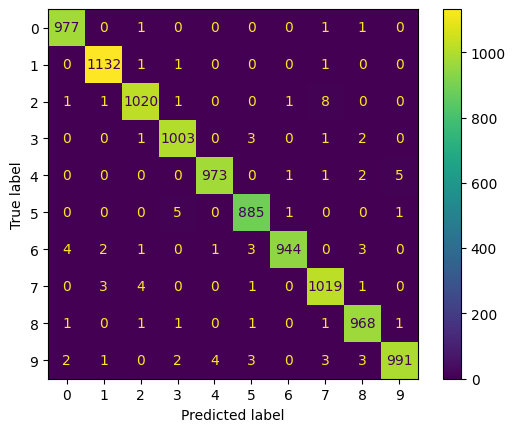

In [44]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(ytest, ypred_test)

In [45]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



# Save above model for future **use**

In [46]:
model.save('digit_model.keras')

# Load above model

In [47]:
from keras.models import load_model
nn = load_model('/content/digit_model.keras')
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [50]:
import cv2
img = cv2.imread("C:/Users/Dell/Downloads/example_img.jpg", cv2.IMREAD_GRAYSCALE)
img